<a href="https://colab.research.google.com/github/vadhri/ai-notebook/blob/main/images/multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.1 MB/s eta 0:00:00


## Minimal network
Basic network layer with thee components,
- input layer,
- hidden layer,
- output layer

In [ ]:
import torch
import torch.nn as nn
from torchviz import make_dot

# input to hidden
i_h_layer = nn.Linear(3,4,bias=False)

# hidden to output
h_o_layer = nn.Linear(4,1,bias=False)

# model connecting layers sequentially
model = nn.Sequential(i_h_layer, nn.ReLU(), h_o_layer)

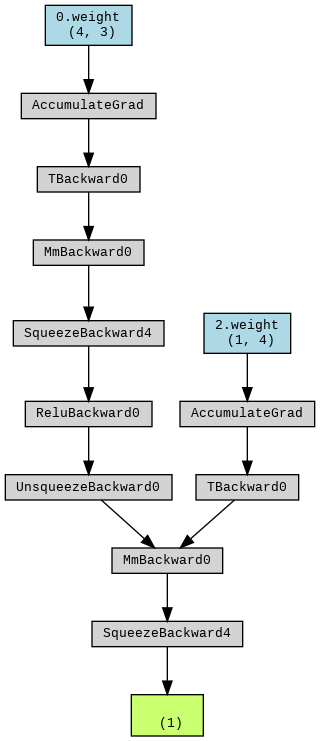

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
y = model(x)
dot = make_dot(model(x), params=dict(model.named_parameters()))
dot.render(filename='model_graph', format='png')
from IPython.display import Image
Image(filename='model_graph.png')

In [ ]:
data = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
prediction = model(data)
target = torch.tensor([11. ], dtype=torch.float32)
loss = nn.L1Loss()
loss(target, prediction)

tensor(10.4864, grad_fn=<MeanBackward0>)

With no training, the model would produce a loss of 10.4864.

## Training the model

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Generate synthetic dataset
np.random.seed(0)
num_samples = 1000
X = np.random.rand(num_samples, 4)
Y = np.sum(X, axis=1, keepdims=True)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)

class LinearEqModel(nn.Module):
    def __init__(self):
      super(LinearEqModel, self).__init__()
      # input to hidden
      self.i_h_layer = nn.Linear(4,4)
      self.relu = nn.ReLU()
      # hidden to output
      self.h_o_layer = nn.Linear(4,1)

    def forward(self, x):
        x= self.i_h_layer(x)
        x = self.relu(x)
        x = self.h_o_layer(x)
        return x

model = LinearEqModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, Y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    predicted = model(X_tensor)
    print("Predicted:", predicted[:5])
    print("Target:", Y_tensor[:5])


Epoch [100/1000], Loss: 0.0717
Epoch [200/1000], Loss: 0.0345
Epoch [300/1000], Loss: 0.0139
Epoch [400/1000], Loss: 0.0041
Epoch [500/1000], Loss: 0.0008
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000
Predicted: tensor([[2.4116],
        [2.3989],
        [2.6677],
        [1.6518],
        [2.5010]])
Target: tensor([[2.4116],
        [2.3989],
        [2.6677],
        [1.6518],
        [2.5010]])
